In [1]:
# https://pypi.org/project/empiricaldist/
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nsfg = pd.read_hdf('/Users/hyunjung/Desktop/DataCamp/data/nsfg.hdf5','nsfg')
type(nsfg)

pandas.core.frame.DataFrame

In [3]:
nsfg.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


In [4]:
nsfg.shape

(9358, 10)

In [5]:
nsfg.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

In [6]:
pounds= nsfg['birthwgt_lb1']
type(pounds)

pandas.core.series.Series

In [7]:
pounds.head()

0    5.0
1    4.0
2    5.0
3    NaN
4    8.0
Name: birthwgt_lb1, dtype: float64

In [8]:
nsfg.dtypes

caseid            int64
outcome           int64
birthwgt_lb1    float64
birthwgt_oz1    float64
prglngth          int64
nbrnaliv        float64
agecon            int64
agepreg         float64
hpagelb         float64
wgt2013_2015    float64
dtype: object

In [9]:
ounces = nsfg['birthwgt_oz1']
ounces.head()

0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64

In [10]:
pounds.value_counts().sort_index()

0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
98.0       1
99.0      94
Name: birthwgt_lb1, dtype: int64

In [11]:
pounds.describe()

count    6485.000000
mean        8.055204
std        11.178893
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        99.000000
Name: birthwgt_lb1, dtype: float64

In [12]:
pounds = pounds.replace([99,98], np.nan)

In [13]:
pounds.describe()

count    6390.000000
mean        6.703286
std         1.429265
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        17.000000
Name: birthwgt_lb1, dtype: float64

In [14]:
ounces.value_counts().sort_index()

0.0     757
1.0     297
2.0     429
3.0     393
4.0     386
5.0     407
6.0     543
7.0     346
8.0     518
9.0     377
10.0    295
11.0    418
12.0    388
13.0    275
14.0    258
15.0    268
98.0      1
99.0     35
Name: birthwgt_oz1, dtype: int64

In [15]:
ounces.replace([99,98], np.nan, inplace=True)

In [16]:
ounces.describe()

count    6355.000000
mean        6.694099
std         4.533847
min         0.000000
25%         3.000000
50%         6.000000
75%        11.000000
max        15.000000
Name: birthwgt_oz1, dtype: float64

In [17]:
birth_weight = pounds +ounces/16.0
birth_weight.describe()

count    6355.000000
mean        7.120978
std         1.422236
min         0.000000
25%         6.375000
50%         7.187500
75%         8.000000
max        17.937500
dtype: float64

In [18]:
nsfg['outcome'].value_counts().sort_index()

1    6489
2     947
3      86
4    1469
5     118
6     249
Name: outcome, dtype: int64

## Filter and Visualize
----


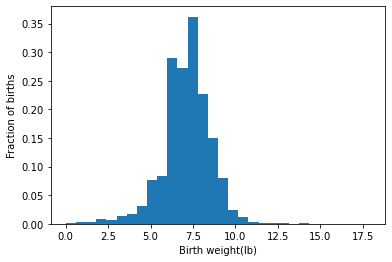

In [19]:
#pyplot doesn't work with nan values
plt.hist(birth_weight.dropna(),
        bins=30,
        density=True)

plt.xlabel('Birth weight(lb)')
plt.ylabel('Fraction of births')
plt.show()

The histogram tells: 
- The shape of distribution is like bell-shaped.
- There are more lighter babies than heavier babies due to pre-matured babies(<37weeks). 
- The result leads to analysis on pregnency length. column:'prglngth'

In [20]:
birth_weight

0       5.2500
1       4.7500
2       5.2500
3          NaN
4       8.8125
         ...  
9353    4.6875
9354    8.4375
9355    7.3750
9356    8.1875
9357    8.3125
Length: 9358, dtype: float64

In [21]:
preterm= nsfg['prglngth']<37

In [22]:
preterm.value_counts()

False    5616
True     3742
Name: prglngth, dtype: int64

In [23]:
preterm.value_counts(normalize=True)

False    0.600128
True     0.399872
Name: prglngth, dtype: float64

In [24]:
preterm_weight= birth_weight[preterm]
preterm_weight.mean()

5.577598314606742

In [25]:
full_term_weight= birth_weight[~preterm]
full_term_weight.mean()

7.372323879231473

In [26]:
full_term = nsfg['prglngth'] >= 37

# Filter single births
single = nsfg['nbrnaliv'] ==1

# Compute birth weight for single full-term babies
single_full_term_weight = birth_weight[single & full_term]
print('Single full-term mean:', single_full_term_weight.mean())

# Compute birth weight for multiple full-term babies
mult_full_term_weight = birth_weight[~single & full_term]
print('Multiple full-term mean:', mult_full_term_weight.mean())

Single full-term mean: 7.385643450184502
Multiple full-term mean: 5.768055555555556


### Resampling
----
- NSFG is not representative
- Some groups are 'oversampled'
- Thus, we can correct using resample_rows_weighted()

## Probability mass functions
----
- PMF contains the unique values in the dataset and how <strong>often</strong> each one appears. 
- The PMF shows all unique values, so we can see exactly where the peaks are. 
- Because the histogram puts values into bins, it obscures some details.

In [27]:
gss = pd.read_hdf('/Users/hyunjung/Desktop/DataCamp/data/gss.hdf5','gss')
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


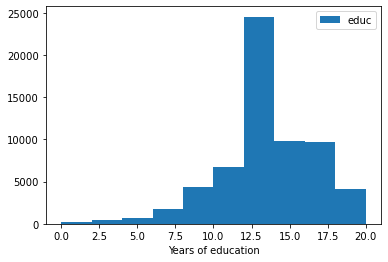

In [28]:
educ= gss['educ']
plt.hist(educ.dropna(), label='educ')

plt.xlabel('Years of education')
plt.legend()
plt.show()

In [29]:
from empiricaldist import Pmf

In [30]:
pmf_educ = Pmf(educ)
pmf_educ.head()

0    18.0
1    12.0
2    12.0
3    14.0
4    12.0
Name: educ, dtype: float64

In [31]:
pmf_educ[12]

11.0

## Cumulative distribution functions
----
- From PMF to CDF: if you draw a random element from a distribution:
    - PMF is the probability that you get exactly x
    - CDF is the probability that you get a value <=x
- CDF is the cumulative sum of the PMF

In [33]:
# From Comparing distribution
print('Happy New year!!!! \n You are going to be super happy in 2021 ')

Happy New year!!!! 
 You are going to be super happy in 2021 


## Comparing distributions
----

In [34]:
male = gss['sex'] == 1
age = gss['age']

In [35]:
male_age= age[male]
female_age = age[~male]

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


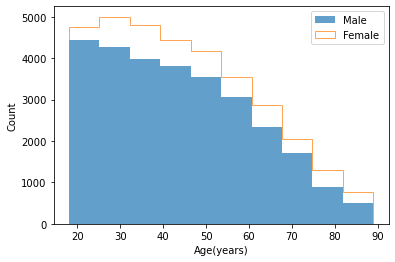

In [36]:
plt.hist(male_age, alpha=0.7,label='Male', histtype='bar')
plt.hist(female_age,alpha=0.7, label='Female',histtype='step')

plt.legend()
plt.xlabel('Age(years)')
plt.ylabel('Count')
plt.show()

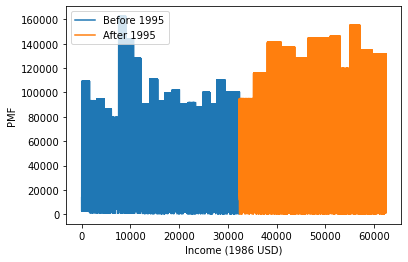

In [37]:
income = gss['realinc']
pre95 = gss['year'] <1995
Pmf(income[pre95]).plot(label='Before 1995')
Pmf(income[~pre95]).plot(label='After 1995')

plt.legend()
plt.xlabel('Income (1986 USD)')
plt.ylabel('PMF')
plt.show()

## Modeling distributions
----
1. Use CDFs for exploration
2. Use PMFs if there are small number of unique values
3. Use KDE if there are a lot of values

In [38]:
from scipy.stats import norm

In [39]:
sample = np.random.normal(size=1000)

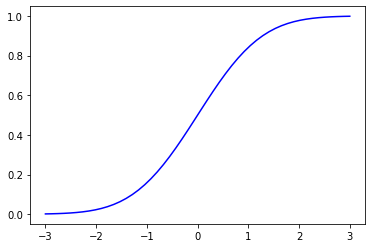

In [40]:
xs = np.linspace(-3, 3)
ys = norm(0,1).cdf(xs) # Cumulative distribution formula

plt.plot(xs, ys, color='blue')

### The bell curve
----

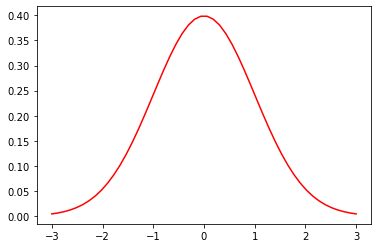

In [41]:
xs = np.linspace(-3,3)
ys = norm(0,1).pdf(xs)  # Standard deviation Z with mean=  0 and std of =1

plt.plot(xs,ys, color='red')

### KDE plot
----

- KDE is a way of getting from a PMF, a probability mass function, to a PDF, a probability density function.
- use seaborn

In [42]:
import seaborn as sns

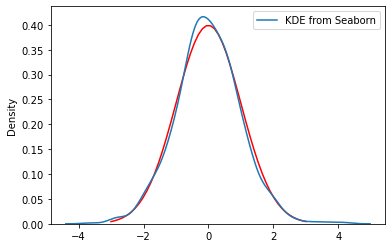

In [43]:
plt.plot(xs,ys, color='red')
sns.kdeplot(sample,label='KDE from Seaborn')

plt.legend()
plt.show()

In [44]:
# Extract realinc and compute its log
income = gss['realinc']
log_income = np.log10(income)

# Compute mean and standard deviation
mean = log_income.mean()
std = log_income.std()
print(mean, std)

# Make a norm object
dist = norm(mean, std)

4.371148677933652 0.4290082383271419


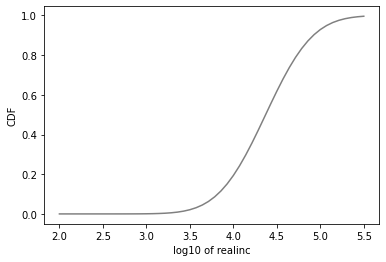

In [45]:
# Evaluate the model CDF
xs = np.linspace(2, 5.5)
ys = dist.cdf(xs)

# Plot the model CDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Create and plot the Cdf of log_income
# Cdf(log_income).plot()
    
# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('CDF')
plt.show()

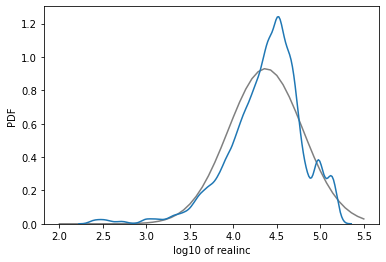

In [46]:
# Evaluate the normal PDF
xs = np.linspace(2, 5.5)
ys = dist.pdf(xs)

# Plot the model PDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Plot the data KDE
sns.kdeplot(log_income)

# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('PDF')
plt.show()

## Exploring relationships
----


In [47]:
brfss = pd.read_hdf('/Users/hyunjung/Desktop/DataCamp/data/brfss.hdf5','brfss')
brfss

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,2.14,150.0,47.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,3.14,160.0,89.5
57312,2.0,163.0,72.57,8.0,390.248599,5.0,2.64,160.0,42.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,1.46,160.0,32.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,1.81,160.0,32.0
...,...,...,...,...,...,...,...,...,...
376876,1.0,173.0,97.52,8.0,12018.935300,3.0,5.57,170.0,32.0
201499,1.0,170.0,68.04,5.0,1939.162770,13.0,2.71,160.0,89.5
192176,1.0,183.0,117.93,4.0,762.342004,8.0,0.53,180.0,57.0
342705,1.0,175.0,61.23,5.0,1417.690180,2.0,4.29,170.0,27.0


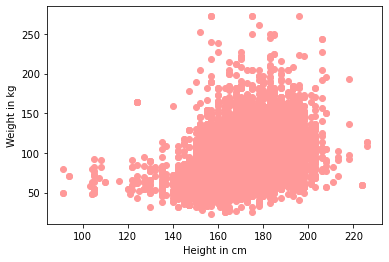

In [48]:
# Using scatter plot for visualize the relationships between the variables.
height= brfss['HTM4']
weight= brfss['WTKG3']

plt.plot(height, weight,'o', color='#ff9999')

plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

# The graph is over-plotted and hard to interpret

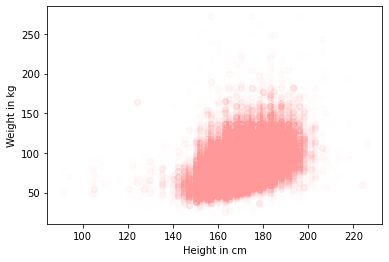

In [49]:
# 1. Use transparency(alpha)
plt.plot(height, weight,'o', color='#ff9999', alpha=0.02)

plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

# Still over-plotted

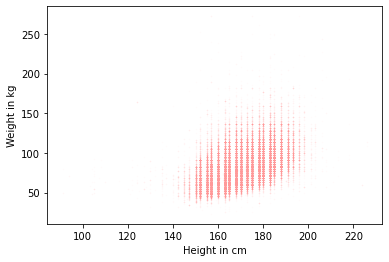

In [50]:
# 2. Edit marker size
plt.plot(height, weight,'o', color='#ff9999',markersize=1, alpha=0.02)

plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

# Less saturated with lower value of alpha and markersize
# However, the points fall in discrete columns.
# Possibly the height was reported with inches and converted to cm.

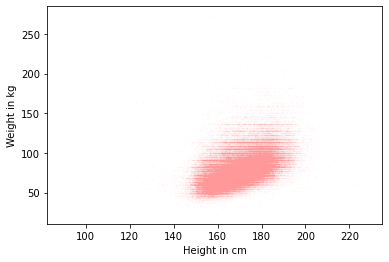

In [51]:
# 3. Add random noise (jittering) to fill discrete columns
height_jitter = height +np.random.normal(0,2, size=len(brfss))
plt.plot(height_jitter, weight,'o', color='#ff9999',markersize=1, alpha=0.02)

plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

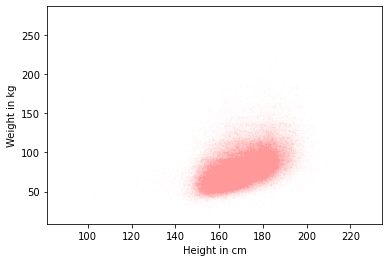

In [52]:
height_jitter = height +np.random.normal(0,2, size=len(brfss))
weight_jitter = weight + np.random.normal(0,2, size= len(brfss))
plt.plot(height_jitter, weight_jitter,'o', color='#ff9999',markersize=1, alpha=0.02)

plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

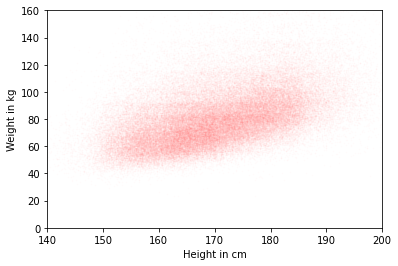

In [53]:
# Zoom

height_jitter = height +np.random.normal(0,2, size=len(brfss))
weight_jitter = weight + np.random.normal(0,2, size= len(brfss))
plt.plot(height_jitter, weight_jitter,'o', color='#ff9999',markersize=1, alpha=0.02)

plt.axis([140,200,0,160])
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

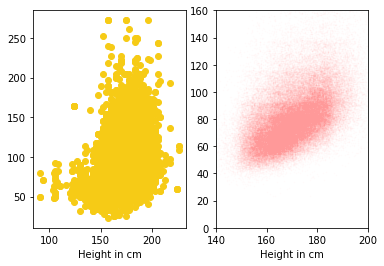

In [54]:
fig, (ax0, ax1)= plt.subplots(ncols=2,nrows=1)

ax0.plot(height, weight,'o', color='#f6cb16')
ax0.set_xlabel('Height in cm')
ax0.set_xlabel('Height in cm')

ax1.plot(height_jitter, weight_jitter,'o', color='#ff9999',markersize=1, alpha=0.02)
ax1.set(xlim=[140,200],ylim=[0,160])

ax1.set_xlabel('Height in cm')

plt.show()


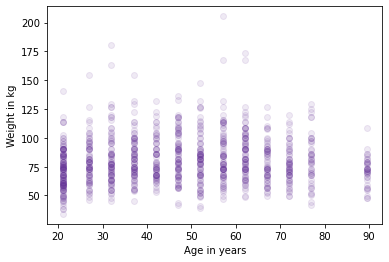

In [55]:
# Select the first 1000 respondents
brfss = brfss[:1000]

# Extract age and weight
age = brfss['AGE']
weight = brfss['WTKG3']

# Make a scatter plot

plt.plot(age, weight,'o', alpha=0.1, color='#663399')
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

plt.show()

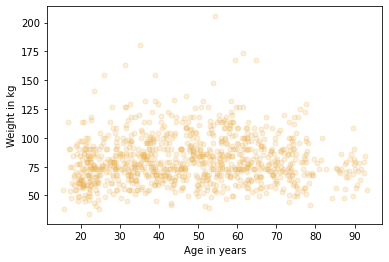

In [56]:
# Select the first 1000 respondents
brfss = brfss[:1000]

# Add jittering to age: random noise to age with mean 0 and standard deviation 2.5.
age = brfss['AGE'] + np.random.normal(0,2.5, size=len(brfss)) 

# Extract weight
weight = brfss['WTKG3']

# Make a scatter plot

plt.plot(age,weight,'o', alpha=0.2, markersize=5, color='#ebaf4c')

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

## Visualizing relationship
----
1. Violin plot
2. Box plot

In [57]:
print(brfss['AGE'].isna().sum())
print(brfss['WTKG3'].isna().sum())

12
59


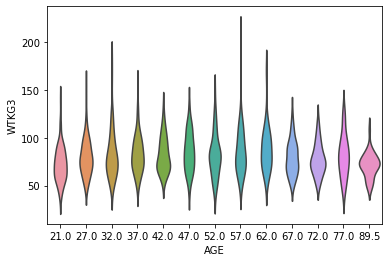

In [58]:
sns.violinplot(data=brfss, x='AGE', y='WTKG3', inner=None)
plt.show()

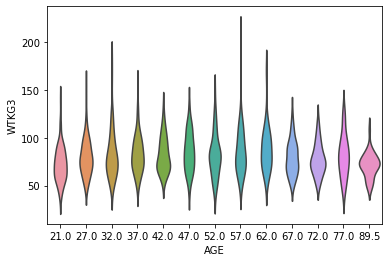

In [59]:
data= brfss.dropna(subset=['AGE','WTKG3']) # Get rid of any missing data from the target columns.
sns.violinplot(data=data, x='AGE', y='WTKG3', inner=None)
plt.show()

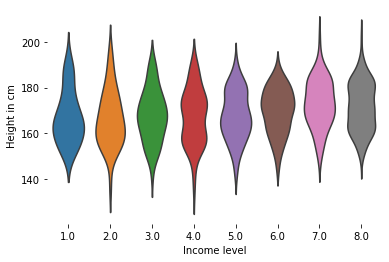

In [60]:
# Drop rows with missing data
data = brfss.dropna(subset=['INCOME2', 'HTM4'])

# Make a violin plot
sns.violinplot(data=data, x='INCOME2', y='HTM4', inner=None)

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Height in cm')
plt.show()

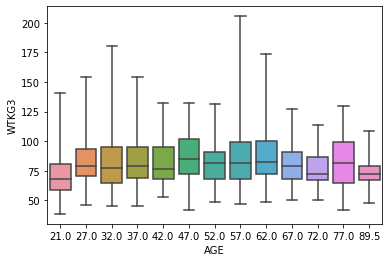

In [61]:
sns.boxplot(data=data, x='AGE', y='WTKG3', whis=10)
plt.show()

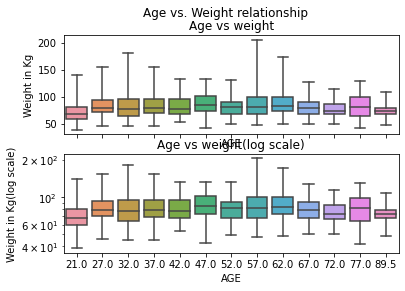

In [62]:
fig, (ax0,ax1)= plt.subplots(nrows=2, ncols=1, sharex=True)

sns.boxplot(data=data, x='AGE', y='WTKG3', ax=ax0, whis=10)
ax0.set(ylabel='Weight in Kg', title='Age vs weight')

sns.boxplot(data=data, x='AGE', y='WTKG3', ax=ax1, whis=10)
ax1.set(ylabel='Weight in Kg(log scale)', title='Age vs weight(log scale)')
plt.yscale('log')

plt.suptitle('Age vs. Weight relationship')
plt.show()

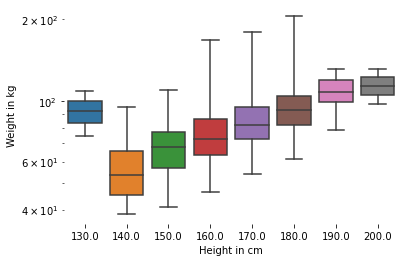

In [63]:
# Drop rows with missing data
data = brfss.dropna(subset=['_HTMG10', 'WTKG3'])

# Make a box plot
sns.boxplot(data=data, x='_HTMG10', y='WTKG3', whis=10)

# Plot the y-axis on a log scale
plt.yscale('log')

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

In [64]:
'''
# Extract income
income = brfss['INCOME2']

# Plot the PMF

Pmf.bar(income)
# Label the axes
plt.xlabel('Income level')
plt.ylabel('PMF')
plt.show()
'''

"\n# Extract income\nincome = brfss['INCOME2']\n\n# Plot the PMF\n\nPmf.bar(income)\n# Label the axes\nplt.xlabel('Income level')\nplt.ylabel('PMF')\nplt.show()\n"

## Correlation
----
- <strong>Correlation coefficient</strong>: In statistics, it usually means <em>Pearson's correlation coefficient</em>, which is a number between -1 and 1 that quantifies the <strong>strength of a linear relationship</strong> between variables. 
- Correlation only works for linear relationships. If the relationship is nonlinear, correlation generally underestimates how strong it is.
- In general, if correlation is high- that is, close to 1 or -1, you can conclude that there is a strong linear relationship. But if correlation is close to 0, that doesn't mean there is no relationship- there might be a strong, non-linear relationship. 

In [67]:
brfss.columns

Index(['SEX', 'HTM4', 'WTKG3', 'INCOME2', '_LLCPWT', '_AGEG5YR', '_VEGESU1',
       '_HTMG10', 'AGE'],
      dtype='object')

In [68]:
columns= ['HTM4','WTKG3','AGE']
subset=brfss[columns]

In [69]:
subset.corr()

,HTM4,WTKG3,AGE
HTM4,1.000000,0.512347,-0.086079
WTKG3,0.512347,1.000000,0.051345
AGE,-0.086079,0.051345,1.000000


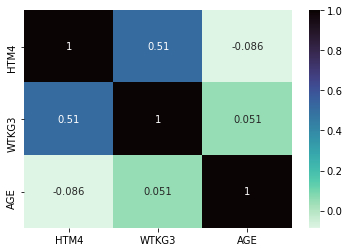

In [73]:
sns.heatmap(subset.corr(),
            cmap='mako_r',
           annot=True)

               AGE   INCOME2  _VEGESU1
AGE       1.000000 -0.014141 -0.021548
INCOME2  -0.014141  1.000000  0.115264
_VEGESU1 -0.021548  0.115264  1.000000


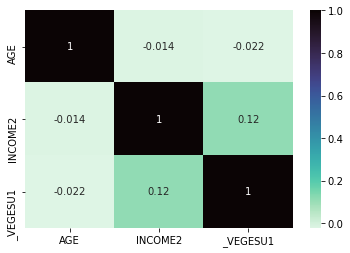

In [87]:
# Select columns
columns_1 = ['AGE', 'INCOME2','_VEGESU1']
subset_1 = brfss[columns_1]

# Compute the correlation matrix
print(subset_1.corr())

sns.heatmap(subset_1.corr(),
            cmap='mako_r',
           annot=True)

In [79]:
# Demonstration for non-linear and correlation.
xs = np.linspace(-1,1)
ys = xs**2 #non-linear
ys += np.random.normal(0,0.05, len(xs))

[[ 1.         -0.04163217]
 [-0.04163217  1.        ]]


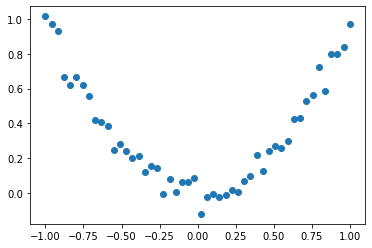

In [86]:
# In general, if correlation is high- that is, close to 1 or -1, 
# you can conclude that there is a strong linear relationship. 
# But if correlation is close to 0, that doesn't mean there is no relationship - there might be a strong, non-linear relationship. 

print(np.corrcoef(xs, ys))

plt.scatter(xs, ys)
plt.show()

## Simple regression
----

In [91]:
# Strengh of effect
from scipy.stats import linregress

# Example:
res = linregress(xs,ys)
print(res)

LinregressResult(slope=-0.021973482067574945, intercept=0.3450777692057067, rvalue=-0.04163216797582574, pvalue=0.7740644414302553, stderr=0.07611540166588071)


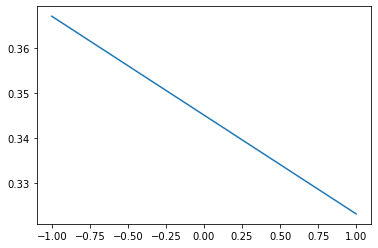

In [92]:
fx = np.array([xs.min(), xs.max()])
fy = res.intercept +res.slope *fx # y=b+ax
plt.plot(fx,fy,'-')

In [93]:
subset_w_h= brfss.dropna(subset=['WTKG3', 'HTM4'])
xs = subset_w_h['HTM4']
ys = subset_w_h['WTKG3']
res = linregress(xs, ys)
print(res)

LinregressResult(slope=0.9756429097243612, intercept=-85.06047892117603, rvalue=0.5123470895624024, pvalue=3.0310337770848186e-63, stderr=0.05374057063828036)


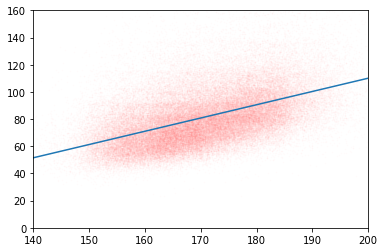

In [97]:
fx = np.array([xs.min(), xs.max()])
fy = res.intercept +res.slope *fx # y=b+ax

plt.plot(height_jitter, weight_jitter,'o', color='#ff9999',markersize=1, alpha=0.02)
plt.plot(fx,fy,'-')
plt.xlim(140,200)
plt.ylim(0,160)
plt.show()

Interpretation:
1. The slope of the line(above) seems consistent with the scatter plot.
2. However, linear regression only measures the <strong> strength of a linear relationship</strong>

LinregressResult(slope=0.05653044488692333, intercept=78.09706621385563, rvalue=0.05134541160718097, pvalue=0.11724633465600308, stderr=0.03605504624816181)


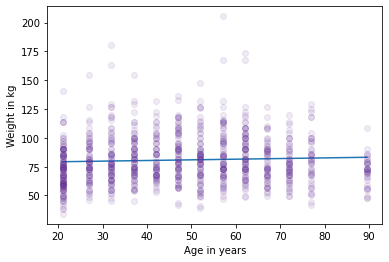

In [101]:
# Select the first 1000 respondents
brfss = brfss[:1000]

# Extract age and weight
age = brfss['AGE']
weight = brfss['WTKG3']

# Regression formula

subset_w_a= brfss.dropna(subset=['WTKG3','AGE'])

xs_age= subset_w_a['AGE']
ys_weight= subset_w_a['WTKG3']

res = linregress(xs_age, ys_weight)
print(res)
fx = np.array([xs_age.min(), xs_age.max()])
fy = res.intercept +res.slope *fx # y=b+ax

# Make plots

plt.plot(fx,fy,'-')
plt.plot(age, weight,'o', alpha=0.1, color='#663399')
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

plt.show()


In [102]:
# Extract the variables
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']

# Compute the linear regression
res = linregress(xs,ys)
print(res)

LinregressResult(slope=0.07000027412424817, intercept=1.5413758521321232, rvalue=0.11526352353306703, pvalue=0.0015115444024927935, stderr=0.021983967667553426)


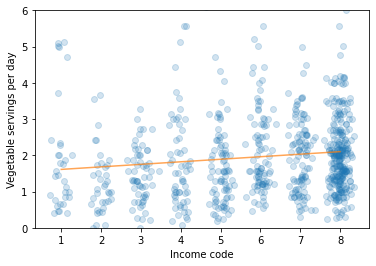

In [103]:
# Plot the scatter plot

x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=0.2)

# Plot the line of best fit
fx = np.array([xs.min(),xs.max()])
fy = res.intercept +res.slope * fx
plt.plot(fx, fy, '-', alpha=0.7)

plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0, 6])
plt.show()

## Limits of simple regression
----
- Regression doesn't imply much about causation.(like what causes what)
- A might cause B or B might cause A or there might be other factors that cause both A and B.

In [104]:
brfss.head()

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,2.14,150.0,47.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,3.14,160.0,89.5
57312,2.0,163.0,72.57,8.0,390.248599,5.0,2.64,160.0,42.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,1.46,160.0,32.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,1.81,160.0,32.0


In [106]:
# Multiple regression

import statsmodels.formula.api as smf

# ols = ordinary least squares : another name for regression
results = smf.ols('INCOME2 ~ _VEGESU1', data=brfss).fit() # Formula string: we want to regress(선으로 적합도를 측정) income as a function of vegi consumption.
results.params # Estimated slope and intercept

Intercept    5.579385
_VEGESU1     0.189795
dtype: float64

In [107]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                INCOME2   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     10.14
Date:                Sat, 02 Jan 2021   Prob (F-statistic):            0.00151
Time:                        20:54:02   Log-Likelihood:                -1648.2
No. Observations:                 755   AIC:                             3300.
Df Residuals:                     753   BIC:                             3310.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.5794      0.141     39.709      0.000       5.304       5.855
_VEGESU1       0.1898      0.060      3.184      0.002       0.073       0.307
==============================================================================
Omnibus:                       76.135   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.228
Skew:                          -0.770   Prob(JB):                     8.46e-19
Kurtosis:                       2.477   Cond. No.                         4.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

----

In [108]:
# Run regression with linregress
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']
res = linregress(xs, ys)
print(res)

# Run regression with StatsModels
results = smf.ols('_VEGESU1 ~ INCOME2', data = brfss).fit()
print(results.params)

LinregressResult(slope=0.07000027412424817, intercept=1.5413758521321232, rvalue=0.11526352353306703, pvalue=0.0015115444024927935, stderr=0.021983967667553426)
Intercept    1.541376
INCOME2      0.070000
dtype: float64


## Multiple regression
----

In [109]:
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


In [110]:
# Left(y): realinc is the variable we are trying to predict; 
# Right(x): educ is the variable we are using to inform the predictions.

results = smf.ols('realinc ~ educ', data=gss).fit()
print(results.params)

Intercept   -11539.147837
educ          3586.523659
dtype: float64


In [111]:
# Right(x): I can list as many variables as you like

results = smf.ols('realinc ~ educ+age', data=gss).fit()
print(results.params)

Intercept   -16117.275684
educ          3655.166921
age             83.731804
dtype: float64


In [116]:
gss_age_income= gss[['age','realinc']]
gss_age_income.corr()

,age,realinc
age,1.000000,-0.008596
realinc,-0.008596,1.000000


In [120]:
#The result is a GroupBy object that contains one group for each value of age.
grouped = gss.groupby('age')
print(grouped)

In [122]:
mean_income_by_age = grouped['realinc'].mean()
print(mean_income_by_age)

age
18.0    36696.140255
19.0    33456.860419
20.0    26806.371609
21.0    27161.578191
22.0    27965.731410
            ...     
85.0    20792.064012
86.0    22539.024754
87.0    18200.485317
88.0    20555.524660
89.0    14068.617666
Name: realinc, Length: 72, dtype: float64


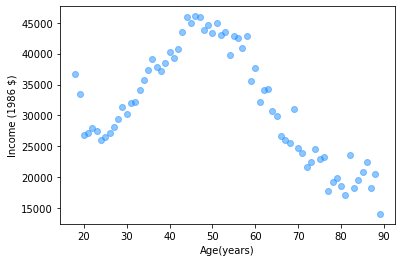

In [123]:
plt.plot(mean_income_by_age, 'o', color='#1e90ff', alpha=0.5)
plt.xlabel('Age(years)')
plt.ylabel('Income (1986 $)')

plt.show()

Interpretation:
- Average income increases from age 20 to age 50, then starts to fall.
- And that explains why the estimated slope is so small, because the relationship is non-linear.
* correlation and simple regression can't measure non-linear relationships. 

In [124]:
# Adding a quadratic term

gss['age2'] = gss['age']**2
model = smf.ols('realinc ~ educ+age+age2', data=gss)
results = model.fit()
print(results.params)

Intercept   -48058.679679
educ          3442.447178
age           1748.232631
age2           -17.437552
dtype: float64


----

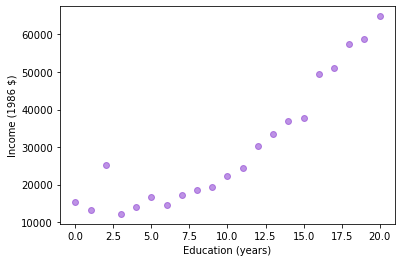

In [125]:
# Group by educ: x-values
grouped = gss.groupby('educ') 

# Compute mean income in each group: y-values
mean_income_by_educ = grouped['realinc'].mean()

# Plot mean income as a scatter plot
plt.plot(mean_income_by_educ, 'o', alpha=0.5, color='#7d26cd')

# Label the axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.show()

In [126]:
# Add a new column with educ squared
gss['educ2'] = gss['educ'] **2

# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2',data=gss).fit()

# Print the estimated parameters
print(results.params)

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64


## Visualizing regression results
----

In [127]:
# Generating predictions
df = pd.DataFrame()
df['age'] = np.linspace(18,85)
df['age2'] = df['age'] **2

df['educ'] = 12 # most common value
df['educ2'] = df['educ']**2

df

,age,age2,educ,educ2
0,18.000000,324.000000,12,144
1,19.367347,375.094127,12,144
2,20.734694,429.927530,12,144
3,22.102041,488.500208,12,144
4,23.469388,550.812162,12,144
5,24.836735,616.863390,12,144
6,26.204082,686.653894,12,144
7,27.571429,760.183673,12,144
8,28.938776,837.452728,12,144
9,30.306122,918.461058,12,144


In [128]:
# results = smf.ols('realinc ~ educ + educ2 + age + age2',data=gss).fit()
# The result from predict() is a Series with one prediction(12years of edu) for each row. 
pred12 = results.predict(df)
pred12

0     18422.699989
1     19864.036105
2     21241.067963
3     22553.795565
4     23802.218909
5     24986.337997
6     26106.152827
7     27161.663401
8     28152.869717
9     29079.771777
10    29942.369580
11    30740.663126
12    31474.652414
13    32144.337446
14    32749.718221
15    33290.794739
16    33767.567000
17    34180.035004
18    34528.198751
19    34812.058241
20    35031.613474
21    35186.864451
22    35277.811170
23    35304.453632
24    35266.791837
25    35164.825786
26    34998.555477
27    34767.980911
28    34473.102089
29    34113.919009
30    33690.431673
31    33202.640080
32    32650.544229
33    32034.144122
34    31353.439758
35    30608.431136
36    29799.118258
37    28925.501123
38    27987.579731
39    26985.354082
40    25918.824176
41    24787.990013
42    23592.851593
43    22333.408916
44    21009.661982
45    19621.610791
46    18169.255343
47    16652.595638
48    15071.631677
49    13426.363458
dtype: float64

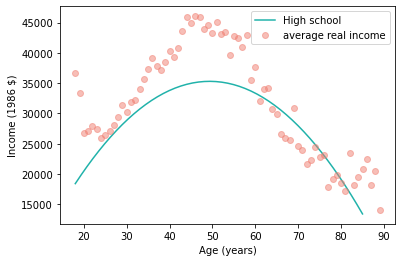

In [131]:
# Plotting predictions
# with age on the x-axis and the predicted income for each age group on the y-axis. 
plt.plot(df['age'], pred12, label='High school', color='#20b2aa')
plt.plot(mean_income_by_age, 'o', alpha=0.5, color='#f07e71', label='average real income')

plt.legend()
plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')
plt.show()

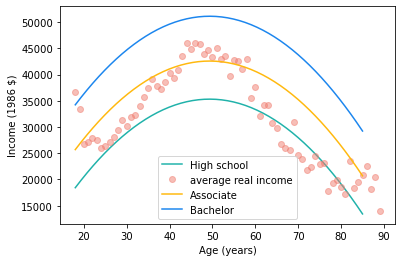

In [132]:
plt.plot(df['age'], pred12, label='High school', color='#20b2aa')
plt.plot(mean_income_by_age, 'o', alpha=0.5, color='#f07e71', label='average real income')

df['educ'] = 14
df['educ2'] = df['educ']**2
pred14 = results.predict(df)
plt.plot(df['age'], pred14, label='Associate', color='#ffb90f')

df['educ'] = 16
df['educ2'] = df['educ'] **2
pred16 = results.predict(df)
plt.plot(df['age'], pred16, label='Bachelor', color='#1c86ee')

plt.legend()
plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')
plt.show()

----

In [133]:
# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit() # Given real data

# Make the DataFrame
df1 = pd.DataFrame()
df1['educ'] = np.linspace(0,20)
df1['age'] = 30
df1['educ2'] = df1['educ']**2
df1['age2'] = df1['age']**2

# Generate and plot the predictions
pred = results.predict(df1)
print(pred.head())

0    12182.344976
1    11993.358518
2    11857.672098
3    11775.285717
4    11746.199374
dtype: float64


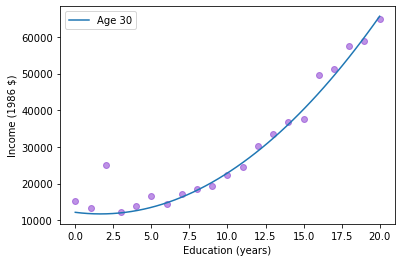

In [134]:
plt.plot(mean_income_by_educ, 'o', alpha=0.5, color='#7d26cd')
plt.plot(df1['educ'], pred, label='Age 30')

# Label axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

## Logistic regression
----
Use: 
1. categorical variables: gender, race
2. Boolean variables

In [135]:
# the letter C indicates that sex is a categorical variable.
results_with_gender = smf.ols('realinc ~ educ + educ2 + age + age2 + C(sex)', data=gss).fit()
results_with_gender.params

Intercept     -22369.453641
C(sex)[T.2]    -4156.113865
educ            -310.247419
educ2            150.514091
age             1703.047502
age2             -17.238711
dtype: float64

Interpretation: 
- The regression treats the value sex=1(male), as the default, and reports the <strong>difference</strong> associated with the value sex=2(female).
- The result indicates that income for women is about $4100 less than for men, after controlling for age and education.

In [136]:
gss['gunlaw'].value_counts()

1.0    30918
2.0     9632
Name: gunlaw, dtype: int64

In [137]:
gss['gunlaw'].replace(2,0, inplace=True) #1: Yes, 2: No

In [138]:
gss['gunlaw'].value_counts()

1.0    30918
0.0     9632
Name: gunlaw, dtype: int64

In [143]:
# logit(): related to logistic regression. 
results_with_gunlaw = smf.logit('gunlaw ~ educ + educ2 + age + age2 + C(sex)', data=gss).fit()
print(results_with_gunlaw.params)

Optimization terminated successfully.
         Current function value: 0.533674
         Iterations 6
Intercept      1.653862
C(sex)[T.2]    0.757249
educ          -0.124373
educ2          0.006653
age           -0.018849
age2           0.000189
dtype: float64


Interpretation: 
1. Positive values are associated with things that make the outcome more likely; 
2. Negative values make the outcome less likely.
3. For example, the parameter associated with sex=2 is 0.75, which indicates that women are more likely to support this form of gun control.

In [144]:
# Generating predictions

df2 = pd.DataFrame()
df2['age'] = np.linspace(18,89)
df2['educ'] = 12

df2['age2'] = df['age'] **2
df2['educ2'] = df['educ'] **2

df2['sex'] =1 # Man
pred1 = results_with_gunlaw.predict(df2)

df2['sex']= 2 # Woman
pred2 = results_with_gunlaw.predict(df2)

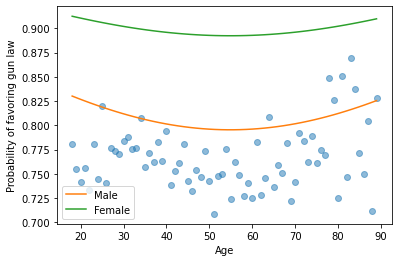

In [148]:
# Visualizing results
grouped = gss.groupby('age')
favor_by_age = grouped['gunlaw'].mean()
plt.plot(favor_by_age, 'o',alpha=0.5)

plt.plot(df2['age'], pred1, label='Male')
plt.plot(df2['age'], pred2, label='Female')

plt.xlabel('Age')
plt.ylabel('Probability of favoring gun law')
plt.legend()
plt.show()

----

Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6


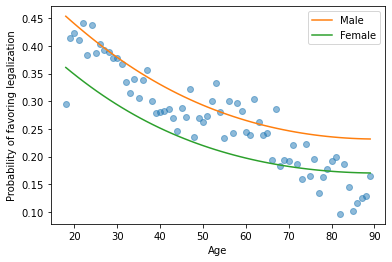

In [149]:
# Recode grass
gss['grass'].replace(2, 0, inplace=True)

# Run logistic regression
results = smf.logit('grass ~ age + age2 + educ + educ2 + C(sex)', data=gss).fit()
results.params

# Make a DataFrame with a range of ages
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['age2'] = df['age']**2

# Set the education level to 12
df['educ'] = 12
df['educ2'] = df['educ']**2

# Generate predictions for men and women
df['sex'] = 1
pred1 = results.predict(df)

df['sex'] = 2
pred2 = results.predict(df)

plt.clf()
grouped = gss.groupby('age')
favor_by_age = grouped['grass'].mean()
plt.plot(favor_by_age, 'o', alpha=0.5)

plt.plot(df['age'], pred1, label='Male')
plt.plot(df['age'], pred2, label='Female')

plt.xlabel('Age')
plt.ylabel('Probability of favoring legalization')
plt.legend()
plt.show()